# Measure T2 using echo height for different sample sizes of glycerin

In [4]:
from matplotlib import pyplot as plt
import scipy as sc
import pandas as pd
import numpy as np
from pathlib import Path
from scipy.optimize import curve_fit

#absolute path of repo root
rel_path = Path("/home/ben/Documents/Repos/382L_NMRLab/data/Feb 09/T2_glycerin_sample_size")

sample_1_peaks = []
T2s = []

In [5]:
def get_peaks(fname, avg_start, avg_end, cutoff_start, cutoff_end, height = None, width = None, prominence = None, distance = None):

    FIDData = pd.read_csv(rel_path / fname, header = None)

    chan1 = FIDData[1].values
    chan2 = FIDData[2].values
    tlist = FIDData[0].values

    avg_window = slice(avg_start, avg_end)
    cutoff_window = slice(cutoff_start, cutoff_end)

    plt.plot(tlist, chan1)
    plt.plot(tlist, chan2)

    plt.axvspan(min(tlist[avg_window]), max(tlist[avg_window]), color = "tab:red", alpha = .5)

    plt.axvspan(min(tlist[cutoff_window]), max(tlist[cutoff_window]), color = "tab:green", alpha = .5)

    plt.show()

    chan1 = np.subtract(chan1, np.mean(chan1[avg_window]))
    chan2 = np.subtract(chan2, np.mean(chan2[avg_window]))

    trans_mag = np.sqrt(np.square(chan1) + np.square(chan2))

    peaks, _ = sc.signal.find_peaks(
        trans_mag[cutoff_window],
    width = width,
    height = height,
        distance = distance,
    )

    peak_times_locs = [(tlist[cutoff_window][peak], trans_mag[cutoff_window][peak]) for peak in peaks]

    stdev = max(trans_mag[avg_window])  - min(trans_mag[avg_window])
    
    plt.plot(tlist,trans_mag, color = "tab:red")
    plt.errorbar([tlist[cutoff_window][peak] for peak in peaks], [trans_mag[cutoff_window][peak] for peak in peaks],yerr = stdev, marker = "o", linestyle = "None")
    plt.show()

    return peak_times_locs

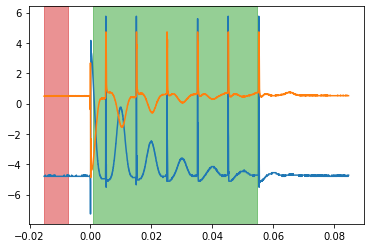

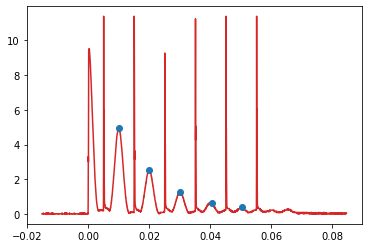

In [6]:
sample_1_peaks += get_peaks("0_29/0_29_a.csv", 0, 200, 400, 1750, height = .1, width = 30, distance = 100)

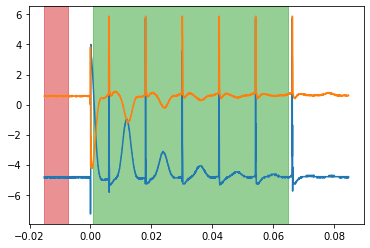

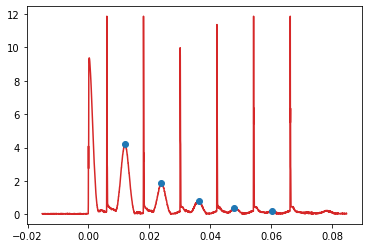

In [258]:
sample_1_peaks += get_peaks("0_29/0_29_b.csv", 0, 200, 400, 2000, width = 20, distance = 100)

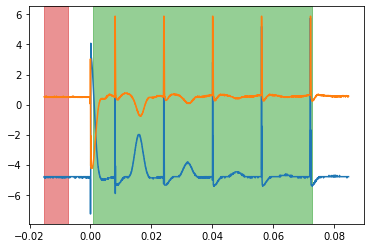

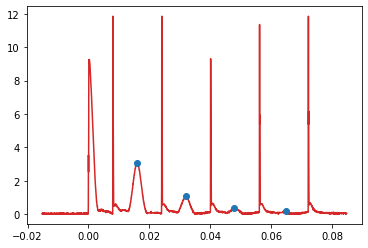

In [259]:
sample_1_peaks += get_peaks("0_29/0_29_c.csv", 0, 200, 400, 2200, width = 5, distance = 100)

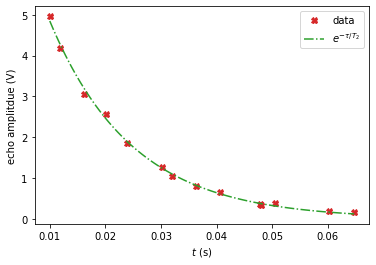

In [260]:
def expfit(t, A, T1):
    return A*np.exp(-t/T1)
times_list, peaks_list = list(zip(*sorted(sample_1_peaks)))

popt, pcov = curve_fit(expfit, times_list, peaks_list, p0 = [10, .02])

plt.plot(times_list, peaks_list, marker = "X", linestyle = "None", color = "tab:red", label = "data")
xlist = np.linspace(min(times_list), max(times_list), 100)
plt.plot(xlist, [expfit(x, *popt) for x in xlist], color = "tab:green", linestyle = "-.", label = r"$e^{-\tau/T_2}$")
plt.legend()
plt.xlabel(r"$t$ (s)")
plt.ylabel("echo amplitdue (V)")

T2s.append(popt[1])

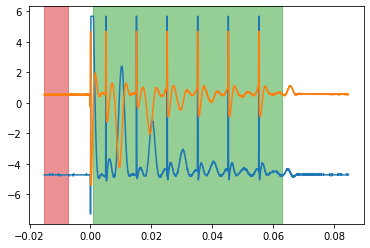

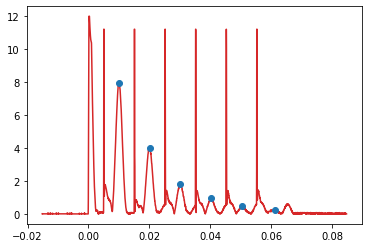

In [261]:
sample_2_peaks = []
sample_2_peaks += get_peaks("0_57/0_57_a.csv", 0, 200, 400, 1950, height = .1, width = 30, distance = 100)

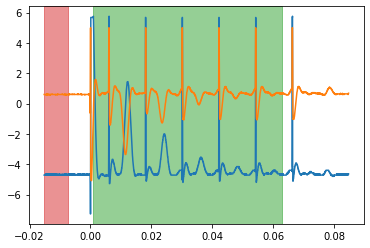

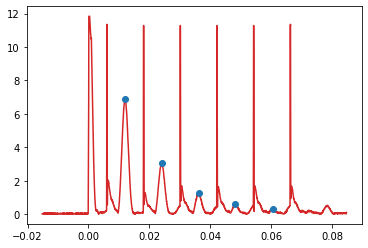

In [262]:
sample_2_peaks += get_peaks("0_57/0_57_b.csv", 0, 200, 400, 1950, height = .1, width = 30, distance = 100)

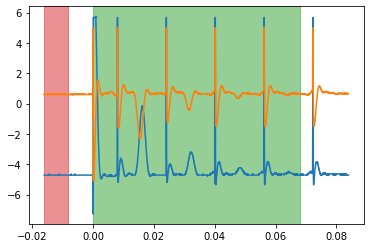

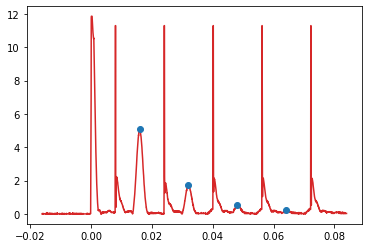

In [263]:
sample_2_peaks += get_peaks("0_57/0_57_c.csv", 0, 200, 400, 2100, height = .1, width = 30, distance = 100)

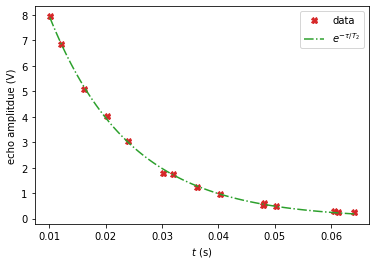

In [264]:
def expfit(t, A, T1):
    return A*np.exp(-t/T1)
times_list, peaks_list = list(zip(*sorted(sample_2_peaks)))

popt, pcov = curve_fit(expfit, times_list, peaks_list, p0 = [10, .02])

plt.plot(times_list, peaks_list, marker = "X", linestyle = "None", color = "tab:red", label = "data")
xlist = np.linspace(min(times_list), max(times_list), 100)
plt.plot(xlist, [expfit(x, *popt) for x in xlist], color = "tab:green", linestyle = "-.", label = r"$e^{-\tau/T_2}$")
plt.legend()
plt.xlabel(r"$t$ (s)")
plt.ylabel("echo amplitdue (V)")

T2s.append(popt[1])

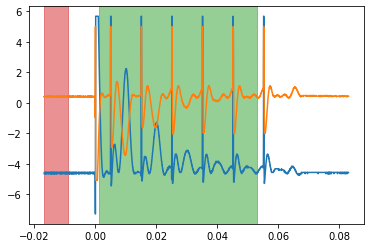

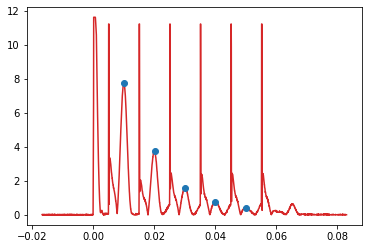

In [265]:
sample_3_peaks = []
sample_3_peaks += get_peaks("0_83/0_83_a.csv", 0, 200, 450, 1750, height = .1, width = 30, distance = 100)

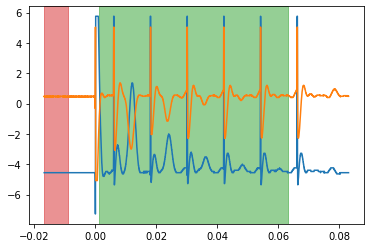

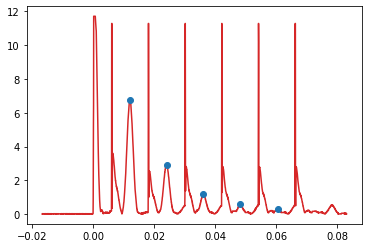

In [266]:
sample_3_peaks += get_peaks("0_83/0_83_b.csv", 0, 200, 450, 2000, height = .1, width = 30, distance = 100)

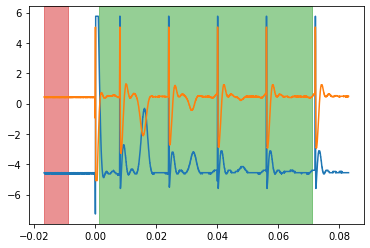

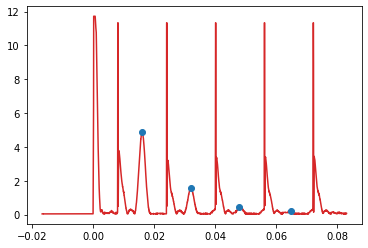

In [267]:
sample_3_peaks += get_peaks("0_83/0_83_c.csv", 0, 200, 450, 2200, width = 10, distance = 150)

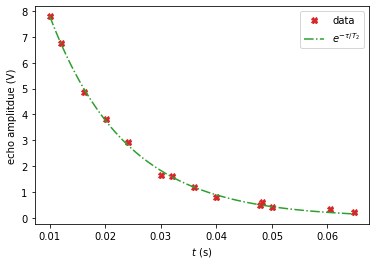

In [268]:
def expfit(t, A, T1):
    return A*np.exp(-t/T1)
times_list, peaks_list = list(zip(*sorted(sample_3_peaks)))

popt, pcov = curve_fit(expfit, times_list, peaks_list, p0 = [10, .02])

plt.plot(times_list, peaks_list, marker = "X", linestyle = "None", color = "tab:red", label = "data")
xlist = np.linspace(min(times_list), max(times_list), 100)
plt.plot(xlist, [expfit(x, *popt) for x in xlist], color = "tab:green", linestyle = "-.", label = r"$e^{-\tau/T_2}$")
plt.legend()
plt.xlabel(r"$t$ (s)")
plt.ylabel("echo amplitdue (V)")

T2s.append(popt[1])

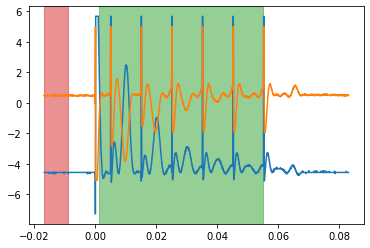

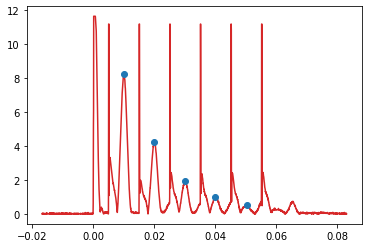

In [269]:
sample_4_peaks = []
sample_4_peaks += get_peaks("1_01/1_01_a.csv", 0, 200, 450, 1800, width = 30, distance = 75)

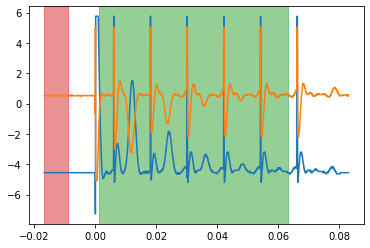

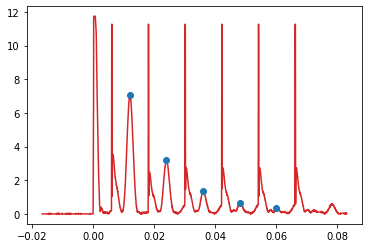

In [270]:
sample_4_peaks += get_peaks("1_01/1_01_b.csv", 0, 200, 450, 2000, width = 30, distance = 100)

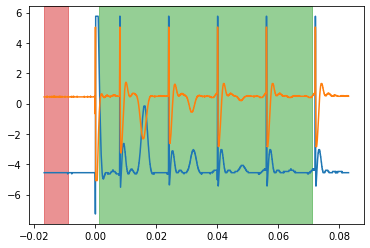

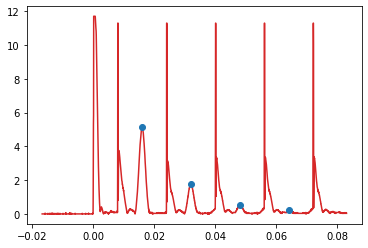

In [271]:
sample_4_peaks += get_peaks("1_01/1_01_c.csv", 0, 200, 450, 2200, width = 10, distance = 150)

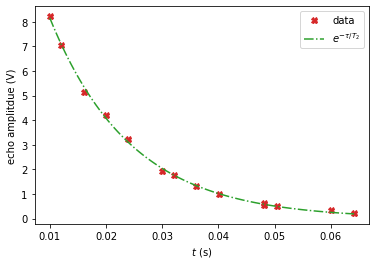

In [272]:
def expfit(t, A, T1):
    return A*np.exp(-t/T1)
times_list, peaks_list = list(zip(*sorted(sample_4_peaks)))

popt, pcov = curve_fit(expfit, times_list, peaks_list, p0 = [10, .02])

plt.plot(times_list, peaks_list, marker = "X", linestyle = "None", color = "tab:red", label = "data")
xlist = np.linspace(min(times_list), max(times_list), 100)
plt.plot(xlist, [expfit(x, *popt) for x in xlist], color = "tab:green", linestyle = "-.", label = r"$e^{-\tau/T_2}$")
plt.legend()
plt.xlabel(r"$t$ (s)")
plt.ylabel("echo amplitdue (V)")

T2s.append(popt[1])

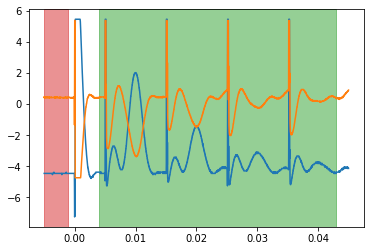

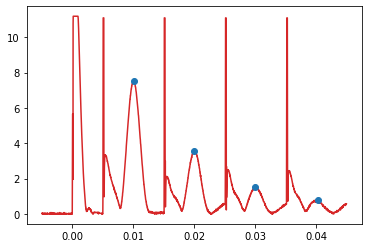

In [273]:
sample_5_peaks = []
sample_5_peaks += get_peaks("1_27/1_27_a.csv", 0, 200, 450, 2400, width = 30, distance = 75)

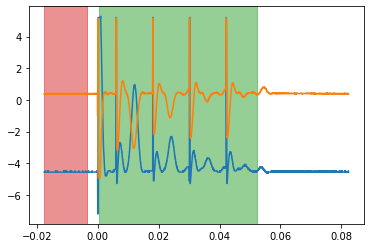

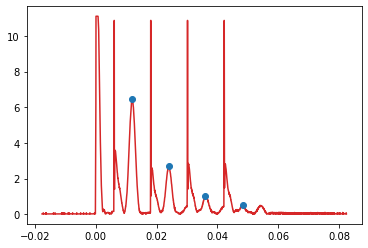

In [274]:
sample_5_peaks += get_peaks("1_27/1_27_b.csv", 0, 350, 450, 1750, width = 30, distance = 75)

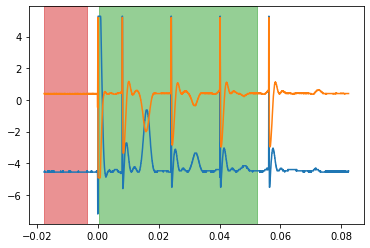

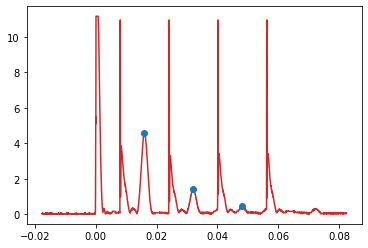

In [275]:
sample_5_peaks += get_peaks("1_27/1_27_c.csv", 0, 350, 450, 1750, width = 30, distance = 150)

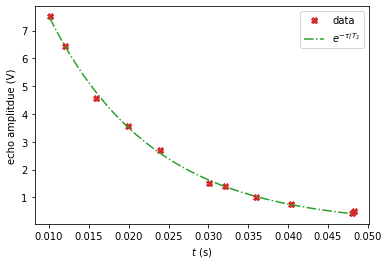

In [276]:
def expfit(t, A, T1):
    return A*np.exp(-t/T1)
times_list, peaks_list = list(zip(*sorted(sample_5_peaks)))

popt, pcov = curve_fit(expfit, times_list, peaks_list, p0 = [10, .02])

plt.plot(times_list, peaks_list, marker = "X", linestyle = "None", color = "tab:red", label = "data")
xlist = np.linspace(min(times_list), max(times_list), 100)
plt.plot(xlist, [expfit(x, *popt) for x in xlist], color = "tab:green", linestyle = "-.", label = r"$e^{-\tau/T_2}$")
plt.legend()
plt.xlabel(r"$t$ (s)")
plt.ylabel("echo amplitdue (V)")

T2s.append(popt[1])

Text(0, 0.5, '$T_2$')

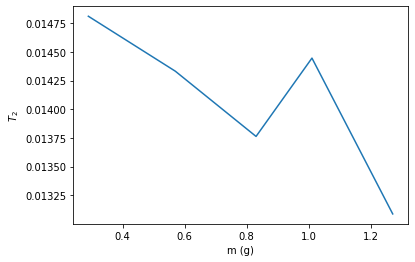

In [278]:
masses = [0.29, 0.57, 0.83, 1.01, 1.27]
plt.plot(masses, T2s)
plt.xlabel("m (g)")
plt.ylabel(r"$T_2$")